# TENSOR AND GRADIENT DESCENT

## TENSOR: Multidimensional Numpy arrays                    (data container)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" 

### Scalars (0D tensors)

In [ ]:
import numpy as np
x = np.array(7)
x.ndim

### Vectors (1D tensors)

In [ ]:
x = np.array([12, 3, 6, 14])
x.ndim

### Matrices (2D tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
x.ndim

### 3D tensors and higher-dimensional tensors

In [ ]:
x = np.array(
[[[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]]])
x.ndim

### Number of axes (rank) = .ndim

### Shape = .shape - Numero de elementos en cada dimensión

### Data Type = Tipo dato

# 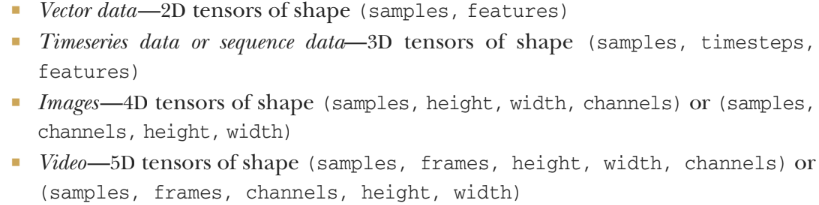

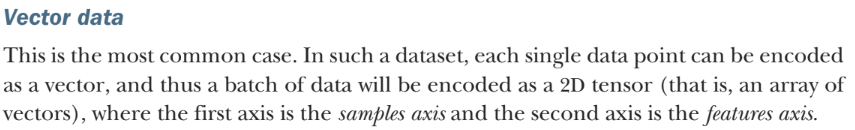

# 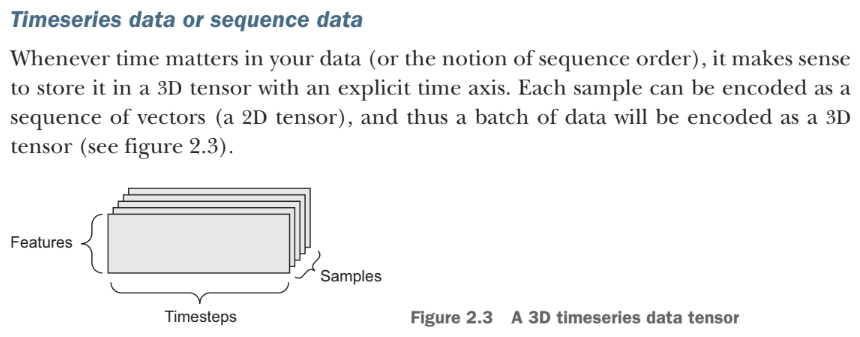

# 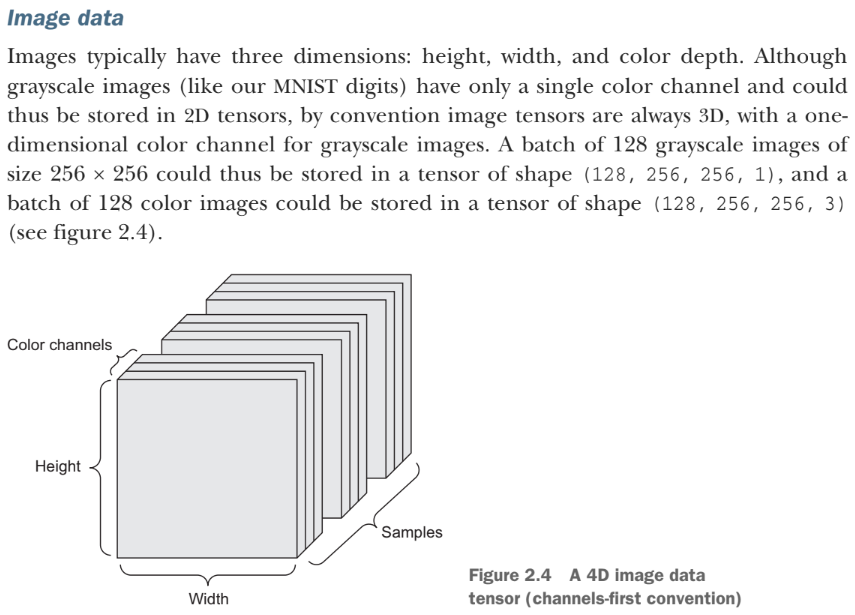

# 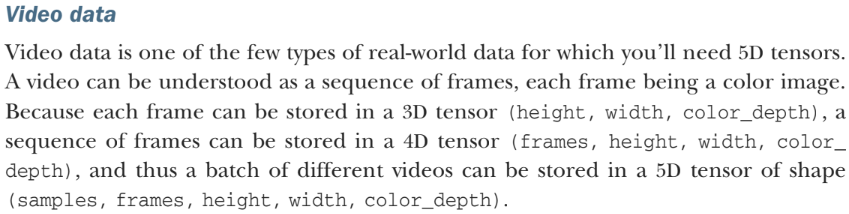

## Tensor Operations

### Element-wise operations

#### relu: max(x, 0)

In [53]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
            #x[i, j] = max(x[i, j], 100)
    return x

x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
e=naive_relu(x)
e

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

#### Addition

In [52]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
y = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
e=naive_add(x,y)
e

array([[ 10, 156,   4,  68,   0],
       [ 12, 158,   6,  70,   2],
       [ 14, 160,   8,  72,   4]])

In [54]:
import numpy as np

x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
y = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])

z=x+y
z

array([[ 10, 156,   4,  68,   0],
       [ 12, 158,   6,  70,   2],
       [ 14, 160,   8,  72,   4]])

### Broadcasting

#### ADD

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
y = np.array([5, 78, 2, 34, 0])
e= naive_add_matrix_and_vector(x,y)
e

#### MAXIMUM

In [ ]:
import numpy as np
x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
y = np.array([100, 78, 2, 34, 0])
z = np.maximum(x, y)
z

### Tensor Dot

In [ ]:
import numpy as np

x = np.array([5, 78, 2, 34, 0])
y = np.array([5, 78, 2, 34, 0])

z = np.dot(x, y)
z

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

x = np.array([5, 78, 2, 34, 0])
y = np.array([5, 78, 2, 34, 0])

naive_vector_dot(x, y)

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
y = np.array([100, 78, 2, 34, 0])

naive_matrix_vector_dot(x, y)

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
y = np.array([100, 78, 2, 34, 0])

naive_matrix_vector_dot(x, y)

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
y = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]]).T

naive_matrix_dot(x, y)

# 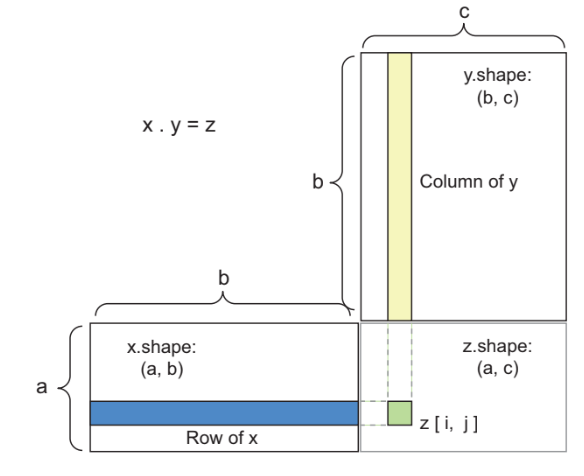

### Tensor Reshaping

In [ ]:
x = np.array([[0., 1.],[2., 3.],[4., 5.]])
print(x.shape)

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = x.reshape((2, 3))
x

#### Transposition 

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

# 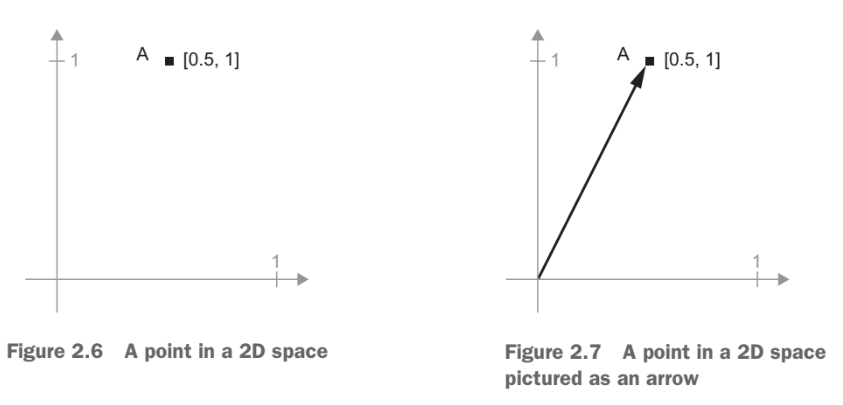

# 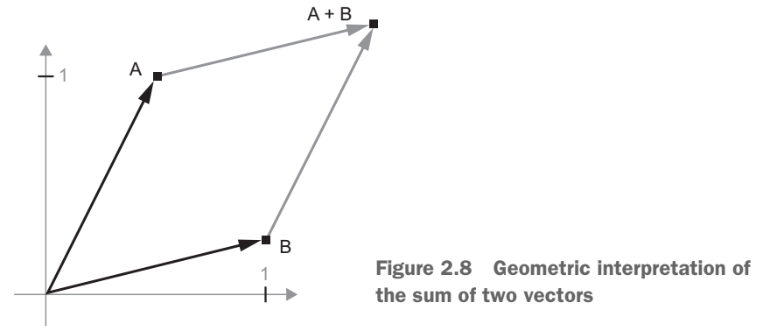

In [62]:
x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
x.shape[0]

(3, 5)